# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

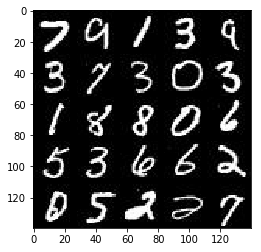

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

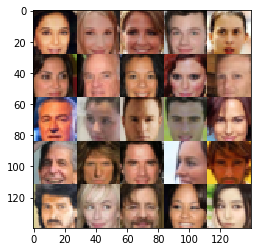

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], "input_real")
    input_z = tf.placeholder(tf.float32, [None, z_dim], "input_z")
    learning_rate = tf.placeholder(tf.float32, None, "learning_rate")

    return input_real, input_z, learning_rate
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.2
        
        h1 = tf.layers.conv2d(images, 64, 5, 2, 'same')
        h1 = tf.maximum(alpha * h1, h1)
        
        h2 = tf.layers.conv2d(h1, 128, 5, 2, 'same')
        h2 = tf.layers.batch_normalization(h2, training=True)
        h2 = tf.maximum(alpha * h2, h2)
        
        h3 = tf.layers.conv2d(h2, 256, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=True)
        h3 = tf.maximum(alpha * h3, h3)
        
        flat = tf.reshape(h3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
    
        h1 = tf.layers.dense(z, 2*2*512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
    
        h2 = tf.layers.conv2d_transpose(h1, 256, 5, 2, 'valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
    
        h3 = tf.layers.conv2d_transpose(h2, 128, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
    
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    d_updates = [opt for opt in update_ops if opt.name.startswith('discriminator')]
    g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]

    with tf.control_dependencies(d_updates):
        d_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)

    with tf.control_dependencies(g_updates):
        g_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
            
    return d_opt, g_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps +=1
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Batch {}...".format(steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, show_n_images, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Batch 10... Discriminator Loss: 0.9327... Generator Loss: 0.7251
Epoch 1/2... Batch 20... Discriminator Loss: 0.2027... Generator Loss: 2.2051
Epoch 1/2... Batch 30... Discriminator Loss: 0.1977... Generator Loss: 2.2440
Epoch 1/2... Batch 40... Discriminator Loss: 0.2105... Generator Loss: 2.2914
Epoch 1/2... Batch 50... Discriminator Loss: 1.2685... Generator Loss: 0.4096
Epoch 1/2... Batch 60... Discriminator Loss: 0.4725... Generator Loss: 3.0798
Epoch 1/2... Batch 70... Discriminator Loss: 0.2662... Generator Loss: 3.2199
Epoch 1/2... Batch 80... Discriminator Loss: 0.5300... Generator Loss: 3.0444
Epoch 1/2... Batch 90... Discriminator Loss: 0.2415... Generator Loss: 2.1448
Epoch 1/2... Batch 100... Discriminator Loss: 0.3394... Generator Loss: 1.9590


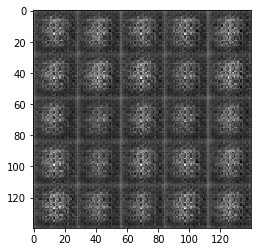

Epoch 1/2... Batch 110... Discriminator Loss: 0.2685... Generator Loss: 2.1927
Epoch 1/2... Batch 120... Discriminator Loss: 0.2718... Generator Loss: 2.4635
Epoch 1/2... Batch 130... Discriminator Loss: 0.1608... Generator Loss: 2.6637
Epoch 1/2... Batch 140... Discriminator Loss: 0.2266... Generator Loss: 2.8092
Epoch 1/2... Batch 150... Discriminator Loss: 0.0931... Generator Loss: 3.7762
Epoch 1/2... Batch 160... Discriminator Loss: 0.3328... Generator Loss: 2.1662
Epoch 1/2... Batch 170... Discriminator Loss: 0.2165... Generator Loss: 3.2106
Epoch 1/2... Batch 180... Discriminator Loss: 0.2010... Generator Loss: 3.7534
Epoch 1/2... Batch 190... Discriminator Loss: 0.1307... Generator Loss: 2.8898
Epoch 1/2... Batch 200... Discriminator Loss: 0.1603... Generator Loss: 3.6045


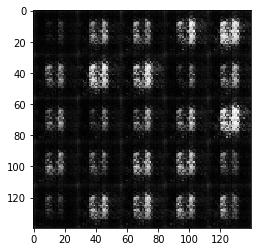

Epoch 1/2... Batch 210... Discriminator Loss: 0.1041... Generator Loss: 3.0307
Epoch 1/2... Batch 220... Discriminator Loss: 0.1484... Generator Loss: 3.0177
Epoch 1/2... Batch 230... Discriminator Loss: 0.0748... Generator Loss: 3.2276
Epoch 1/2... Batch 240... Discriminator Loss: 0.1500... Generator Loss: 5.4849
Epoch 1/2... Batch 250... Discriminator Loss: 0.0675... Generator Loss: 3.3667
Epoch 1/2... Batch 260... Discriminator Loss: 0.2247... Generator Loss: 2.1600
Epoch 1/2... Batch 270... Discriminator Loss: 0.1303... Generator Loss: 2.5358
Epoch 1/2... Batch 280... Discriminator Loss: 0.1361... Generator Loss: 2.6948
Epoch 1/2... Batch 290... Discriminator Loss: 0.0708... Generator Loss: 3.4701
Epoch 1/2... Batch 300... Discriminator Loss: 0.0909... Generator Loss: 3.3532


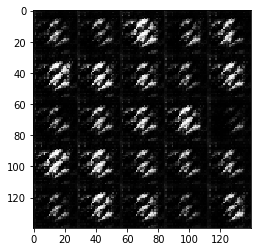

Epoch 1/2... Batch 310... Discriminator Loss: 0.3355... Generator Loss: 2.0405
Epoch 1/2... Batch 320... Discriminator Loss: 0.0615... Generator Loss: 3.5809
Epoch 1/2... Batch 330... Discriminator Loss: 0.1952... Generator Loss: 2.2991
Epoch 1/2... Batch 340... Discriminator Loss: 0.1697... Generator Loss: 3.3778
Epoch 1/2... Batch 350... Discriminator Loss: 0.1603... Generator Loss: 2.5643
Epoch 1/2... Batch 360... Discriminator Loss: 0.0890... Generator Loss: 4.0796
Epoch 1/2... Batch 370... Discriminator Loss: 0.3027... Generator Loss: 1.8071
Epoch 1/2... Batch 380... Discriminator Loss: 0.2004... Generator Loss: 2.8490
Epoch 1/2... Batch 390... Discriminator Loss: 0.1418... Generator Loss: 3.0039
Epoch 1/2... Batch 400... Discriminator Loss: 0.1067... Generator Loss: 3.7631


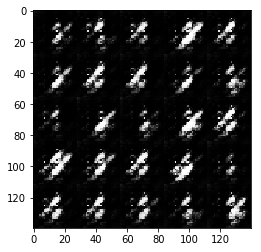

Epoch 1/2... Batch 410... Discriminator Loss: 0.1739... Generator Loss: 3.0266
Epoch 1/2... Batch 420... Discriminator Loss: 0.1601... Generator Loss: 3.5618
Epoch 1/2... Batch 430... Discriminator Loss: 0.1912... Generator Loss: 3.5793
Epoch 1/2... Batch 440... Discriminator Loss: 0.0674... Generator Loss: 4.3679
Epoch 1/2... Batch 450... Discriminator Loss: 0.2328... Generator Loss: 3.6541
Epoch 1/2... Batch 460... Discriminator Loss: 0.1093... Generator Loss: 3.3261
Epoch 1/2... Batch 470... Discriminator Loss: 0.2075... Generator Loss: 2.4599
Epoch 1/2... Batch 480... Discriminator Loss: 0.2369... Generator Loss: 1.9929
Epoch 1/2... Batch 490... Discriminator Loss: 0.1455... Generator Loss: 2.8847
Epoch 1/2... Batch 500... Discriminator Loss: 0.1608... Generator Loss: 3.2998


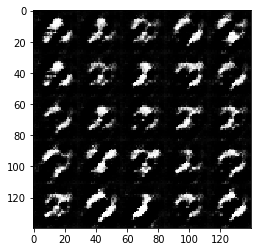

Epoch 1/2... Batch 510... Discriminator Loss: 0.1314... Generator Loss: 3.4088
Epoch 1/2... Batch 520... Discriminator Loss: 0.1596... Generator Loss: 3.2336
Epoch 1/2... Batch 530... Discriminator Loss: 0.1742... Generator Loss: 2.7669
Epoch 1/2... Batch 540... Discriminator Loss: 0.0641... Generator Loss: 3.8464
Epoch 1/2... Batch 550... Discriminator Loss: 0.0995... Generator Loss: 3.3497
Epoch 1/2... Batch 560... Discriminator Loss: 0.3788... Generator Loss: 1.9557
Epoch 1/2... Batch 570... Discriminator Loss: 0.2972... Generator Loss: 3.5257
Epoch 1/2... Batch 580... Discriminator Loss: 0.2046... Generator Loss: 3.0840
Epoch 1/2... Batch 590... Discriminator Loss: 0.1823... Generator Loss: 2.8895
Epoch 1/2... Batch 600... Discriminator Loss: 0.1757... Generator Loss: 6.2796


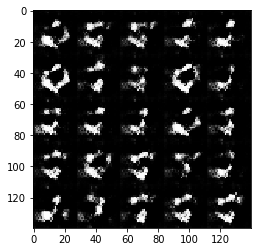

Epoch 1/2... Batch 610... Discriminator Loss: 0.2516... Generator Loss: 4.4647
Epoch 1/2... Batch 620... Discriminator Loss: 0.1583... Generator Loss: 3.3647
Epoch 1/2... Batch 630... Discriminator Loss: 0.2458... Generator Loss: 4.5799
Epoch 1/2... Batch 640... Discriminator Loss: 0.7029... Generator Loss: 7.2083
Epoch 1/2... Batch 650... Discriminator Loss: 0.6627... Generator Loss: 4.5158
Epoch 1/2... Batch 660... Discriminator Loss: 0.2559... Generator Loss: 2.9224
Epoch 1/2... Batch 670... Discriminator Loss: 0.1948... Generator Loss: 2.7918
Epoch 1/2... Batch 680... Discriminator Loss: 0.1522... Generator Loss: 3.2104
Epoch 1/2... Batch 690... Discriminator Loss: 0.2504... Generator Loss: 2.7875
Epoch 1/2... Batch 700... Discriminator Loss: 0.3039... Generator Loss: 2.9330


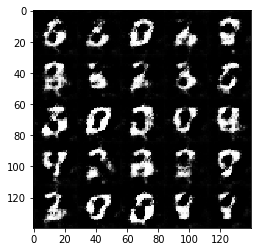

Epoch 1/2... Batch 710... Discriminator Loss: 0.2552... Generator Loss: 2.3732
Epoch 1/2... Batch 720... Discriminator Loss: 0.2193... Generator Loss: 2.8431
Epoch 1/2... Batch 730... Discriminator Loss: 0.1891... Generator Loss: 2.5978
Epoch 1/2... Batch 740... Discriminator Loss: 0.6884... Generator Loss: 4.2526
Epoch 1/2... Batch 750... Discriminator Loss: 0.4632... Generator Loss: 3.3088
Epoch 1/2... Batch 760... Discriminator Loss: 0.3008... Generator Loss: 4.0696
Epoch 1/2... Batch 770... Discriminator Loss: 0.3650... Generator Loss: 2.3538
Epoch 1/2... Batch 780... Discriminator Loss: 0.5725... Generator Loss: 1.3716
Epoch 1/2... Batch 790... Discriminator Loss: 0.6955... Generator Loss: 1.3413
Epoch 1/2... Batch 800... Discriminator Loss: 0.5447... Generator Loss: 1.4801


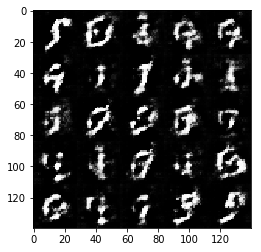

Epoch 1/2... Batch 810... Discriminator Loss: 0.3876... Generator Loss: 2.4792
Epoch 1/2... Batch 820... Discriminator Loss: 0.6479... Generator Loss: 1.0645
Epoch 1/2... Batch 830... Discriminator Loss: 0.4741... Generator Loss: 2.3013
Epoch 1/2... Batch 840... Discriminator Loss: 0.5456... Generator Loss: 1.3359
Epoch 1/2... Batch 850... Discriminator Loss: 0.6704... Generator Loss: 3.8673
Epoch 1/2... Batch 860... Discriminator Loss: 0.5098... Generator Loss: 2.2830
Epoch 1/2... Batch 870... Discriminator Loss: 0.4840... Generator Loss: 1.7375
Epoch 1/2... Batch 880... Discriminator Loss: 0.5156... Generator Loss: 2.7956
Epoch 1/2... Batch 890... Discriminator Loss: 0.4785... Generator Loss: 1.6603
Epoch 1/2... Batch 900... Discriminator Loss: 0.4938... Generator Loss: 2.4057


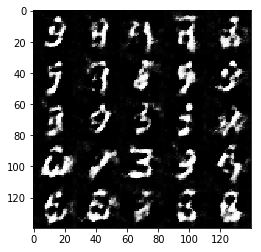

Epoch 1/2... Batch 910... Discriminator Loss: 0.4152... Generator Loss: 1.9763
Epoch 1/2... Batch 920... Discriminator Loss: 0.4945... Generator Loss: 1.7440
Epoch 1/2... Batch 930... Discriminator Loss: 0.7422... Generator Loss: 3.8348
Epoch 2/2... Batch 940... Discriminator Loss: 0.4608... Generator Loss: 1.6907
Epoch 2/2... Batch 950... Discriminator Loss: 1.1367... Generator Loss: 4.3906
Epoch 2/2... Batch 960... Discriminator Loss: 0.3893... Generator Loss: 2.7955
Epoch 2/2... Batch 970... Discriminator Loss: 0.5721... Generator Loss: 1.6218
Epoch 2/2... Batch 980... Discriminator Loss: 0.4895... Generator Loss: 3.2239
Epoch 2/2... Batch 990... Discriminator Loss: 0.3639... Generator Loss: 2.0086
Epoch 2/2... Batch 1000... Discriminator Loss: 0.3545... Generator Loss: 2.7211


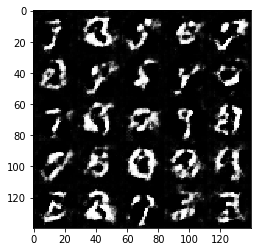

Epoch 2/2... Batch 1010... Discriminator Loss: 0.3588... Generator Loss: 1.8669
Epoch 2/2... Batch 1020... Discriminator Loss: 0.8116... Generator Loss: 0.8463
Epoch 2/2... Batch 1030... Discriminator Loss: 1.3717... Generator Loss: 0.4664
Epoch 2/2... Batch 1040... Discriminator Loss: 0.6214... Generator Loss: 1.3224
Epoch 2/2... Batch 1050... Discriminator Loss: 0.5475... Generator Loss: 1.3870
Epoch 2/2... Batch 1060... Discriminator Loss: 0.4796... Generator Loss: 1.6669
Epoch 2/2... Batch 1070... Discriminator Loss: 0.6953... Generator Loss: 1.0228
Epoch 2/2... Batch 1080... Discriminator Loss: 0.5777... Generator Loss: 2.6036
Epoch 2/2... Batch 1090... Discriminator Loss: 0.8887... Generator Loss: 0.7580
Epoch 2/2... Batch 1100... Discriminator Loss: 0.4995... Generator Loss: 1.5504


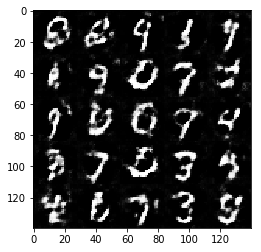

Epoch 2/2... Batch 1110... Discriminator Loss: 0.5336... Generator Loss: 1.9324
Epoch 2/2... Batch 1120... Discriminator Loss: 0.6968... Generator Loss: 0.9325
Epoch 2/2... Batch 1130... Discriminator Loss: 0.5549... Generator Loss: 1.9863
Epoch 2/2... Batch 1140... Discriminator Loss: 0.8802... Generator Loss: 3.6228
Epoch 2/2... Batch 1150... Discriminator Loss: 0.6469... Generator Loss: 1.0962
Epoch 2/2... Batch 1160... Discriminator Loss: 1.2534... Generator Loss: 3.9110
Epoch 2/2... Batch 1170... Discriminator Loss: 0.6077... Generator Loss: 1.3215
Epoch 2/2... Batch 1180... Discriminator Loss: 0.5185... Generator Loss: 1.7155
Epoch 2/2... Batch 1190... Discriminator Loss: 0.3687... Generator Loss: 1.8394
Epoch 2/2... Batch 1200... Discriminator Loss: 0.7374... Generator Loss: 0.9021


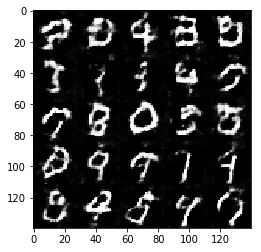

Epoch 2/2... Batch 1210... Discriminator Loss: 0.6051... Generator Loss: 1.8381
Epoch 2/2... Batch 1220... Discriminator Loss: 0.6876... Generator Loss: 1.0192
Epoch 2/2... Batch 1230... Discriminator Loss: 0.5958... Generator Loss: 1.2664
Epoch 2/2... Batch 1240... Discriminator Loss: 0.5803... Generator Loss: 1.9323
Epoch 2/2... Batch 1250... Discriminator Loss: 0.4943... Generator Loss: 1.8211
Epoch 2/2... Batch 1260... Discriminator Loss: 0.3983... Generator Loss: 1.7071
Epoch 2/2... Batch 1270... Discriminator Loss: 0.4749... Generator Loss: 1.8876
Epoch 2/2... Batch 1280... Discriminator Loss: 1.4993... Generator Loss: 4.3154
Epoch 2/2... Batch 1290... Discriminator Loss: 0.5824... Generator Loss: 1.2154
Epoch 2/2... Batch 1300... Discriminator Loss: 0.6528... Generator Loss: 1.0197


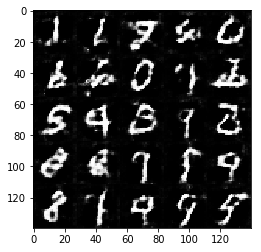

Epoch 2/2... Batch 1310... Discriminator Loss: 0.7050... Generator Loss: 0.9102
Epoch 2/2... Batch 1320... Discriminator Loss: 0.4850... Generator Loss: 1.7085
Epoch 2/2... Batch 1330... Discriminator Loss: 0.5317... Generator Loss: 1.6620
Epoch 2/2... Batch 1340... Discriminator Loss: 0.4284... Generator Loss: 1.4891
Epoch 2/2... Batch 1350... Discriminator Loss: 0.7419... Generator Loss: 2.6802
Epoch 2/2... Batch 1360... Discriminator Loss: 0.5084... Generator Loss: 1.4729
Epoch 2/2... Batch 1370... Discriminator Loss: 0.6605... Generator Loss: 2.7959
Epoch 2/2... Batch 1380... Discriminator Loss: 0.5186... Generator Loss: 1.7798
Epoch 2/2... Batch 1390... Discriminator Loss: 0.4878... Generator Loss: 1.5464
Epoch 2/2... Batch 1400... Discriminator Loss: 0.6950... Generator Loss: 1.0524


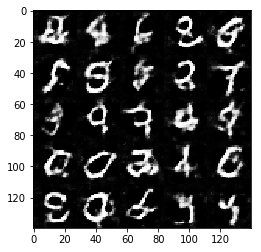

Epoch 2/2... Batch 1410... Discriminator Loss: 0.4943... Generator Loss: 2.5622
Epoch 2/2... Batch 1420... Discriminator Loss: 0.5678... Generator Loss: 2.0837
Epoch 2/2... Batch 1430... Discriminator Loss: 0.5913... Generator Loss: 1.3657
Epoch 2/2... Batch 1440... Discriminator Loss: 1.2457... Generator Loss: 0.4646
Epoch 2/2... Batch 1450... Discriminator Loss: 0.7278... Generator Loss: 0.9070
Epoch 2/2... Batch 1460... Discriminator Loss: 0.4508... Generator Loss: 1.5687
Epoch 2/2... Batch 1470... Discriminator Loss: 0.5614... Generator Loss: 1.1361
Epoch 2/2... Batch 1480... Discriminator Loss: 0.5938... Generator Loss: 1.7891
Epoch 2/2... Batch 1490... Discriminator Loss: 0.7126... Generator Loss: 1.1350
Epoch 2/2... Batch 1500... Discriminator Loss: 0.5777... Generator Loss: 1.5679


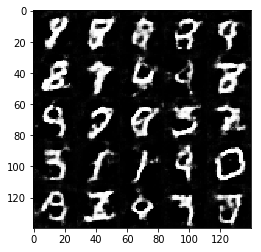

Epoch 2/2... Batch 1510... Discriminator Loss: 0.5973... Generator Loss: 1.4759
Epoch 2/2... Batch 1520... Discriminator Loss: 0.6679... Generator Loss: 1.6219
Epoch 2/2... Batch 1530... Discriminator Loss: 0.7022... Generator Loss: 1.1424
Epoch 2/2... Batch 1540... Discriminator Loss: 0.8104... Generator Loss: 0.7644
Epoch 2/2... Batch 1550... Discriminator Loss: 0.5736... Generator Loss: 1.4725
Epoch 2/2... Batch 1560... Discriminator Loss: 0.5902... Generator Loss: 1.1621
Epoch 2/2... Batch 1570... Discriminator Loss: 0.4910... Generator Loss: 1.7618
Epoch 2/2... Batch 1580... Discriminator Loss: 0.5338... Generator Loss: 1.9703
Epoch 2/2... Batch 1590... Discriminator Loss: 0.7468... Generator Loss: 2.6231
Epoch 2/2... Batch 1600... Discriminator Loss: 0.6366... Generator Loss: 1.1949


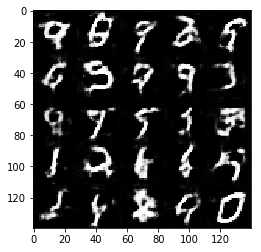

Epoch 2/2... Batch 1610... Discriminator Loss: 1.0401... Generator Loss: 0.6124
Epoch 2/2... Batch 1620... Discriminator Loss: 0.7961... Generator Loss: 1.8625
Epoch 2/2... Batch 1630... Discriminator Loss: 0.5828... Generator Loss: 1.2578
Epoch 2/2... Batch 1640... Discriminator Loss: 0.5856... Generator Loss: 1.8800
Epoch 2/2... Batch 1650... Discriminator Loss: 0.7096... Generator Loss: 0.9770
Epoch 2/2... Batch 1660... Discriminator Loss: 0.5766... Generator Loss: 2.7159
Epoch 2/2... Batch 1670... Discriminator Loss: 0.5809... Generator Loss: 2.2170
Epoch 2/2... Batch 1680... Discriminator Loss: 0.4871... Generator Loss: 1.5116
Epoch 2/2... Batch 1690... Discriminator Loss: 1.5108... Generator Loss: 0.3461
Epoch 2/2... Batch 1700... Discriminator Loss: 0.4358... Generator Loss: 1.7243


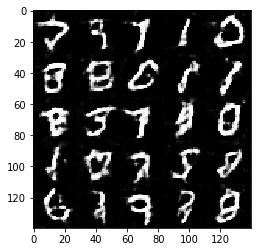

Epoch 2/2... Batch 1710... Discriminator Loss: 0.4479... Generator Loss: 1.6735
Epoch 2/2... Batch 1720... Discriminator Loss: 0.6186... Generator Loss: 2.4187
Epoch 2/2... Batch 1730... Discriminator Loss: 0.6640... Generator Loss: 0.9827
Epoch 2/2... Batch 1740... Discriminator Loss: 0.8008... Generator Loss: 2.8845
Epoch 2/2... Batch 1750... Discriminator Loss: 0.7523... Generator Loss: 2.0018
Epoch 2/2... Batch 1760... Discriminator Loss: 0.5204... Generator Loss: 1.9767
Epoch 2/2... Batch 1770... Discriminator Loss: 0.6677... Generator Loss: 0.9836
Epoch 2/2... Batch 1780... Discriminator Loss: 0.5496... Generator Loss: 1.3496
Epoch 2/2... Batch 1790... Discriminator Loss: 0.7912... Generator Loss: 0.8144
Epoch 2/2... Batch 1800... Discriminator Loss: 0.5610... Generator Loss: 1.8626


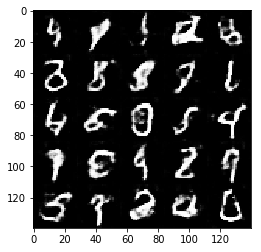

Epoch 2/2... Batch 1810... Discriminator Loss: 0.6205... Generator Loss: 1.1408
Epoch 2/2... Batch 1820... Discriminator Loss: 0.6073... Generator Loss: 1.2532
Epoch 2/2... Batch 1830... Discriminator Loss: 0.6044... Generator Loss: 1.5502
Epoch 2/2... Batch 1840... Discriminator Loss: 0.5407... Generator Loss: 1.7616
Epoch 2/2... Batch 1850... Discriminator Loss: 0.5687... Generator Loss: 1.4160
Epoch 2/2... Batch 1860... Discriminator Loss: 0.4533... Generator Loss: 1.4984
Epoch 2/2... Batch 1870... Discriminator Loss: 0.5836... Generator Loss: 1.9847


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch 10... Discriminator Loss: 1.1105... Generator Loss: 0.7522
Epoch 1/1... Batch 20... Discriminator Loss: 0.7672... Generator Loss: 0.8135
Epoch 1/1... Batch 30... Discriminator Loss: 1.4973... Generator Loss: 0.2811
Epoch 1/1... Batch 40... Discriminator Loss: 0.4583... Generator Loss: 1.2885
Epoch 1/1... Batch 50... Discriminator Loss: 0.1190... Generator Loss: 6.6835
Epoch 1/1... Batch 60... Discriminator Loss: 0.1932... Generator Loss: 2.3620
Epoch 1/1... Batch 70... Discriminator Loss: 0.7410... Generator Loss: 8.0139
Epoch 1/1... Batch 80... Discriminator Loss: 0.2364... Generator Loss: 6.5959
Epoch 1/1... Batch 90... Discriminator Loss: 2.3726... Generator Loss: 0.1233
Epoch 1/1... Batch 100... Discriminator Loss: 0.2749... Generator Loss: 1.7913


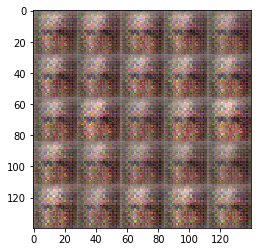

Epoch 1/1... Batch 110... Discriminator Loss: 0.2225... Generator Loss: 1.8495
Epoch 1/1... Batch 120... Discriminator Loss: 0.3018... Generator Loss: 7.4776
Epoch 1/1... Batch 130... Discriminator Loss: 0.5907... Generator Loss: 5.8227
Epoch 1/1... Batch 140... Discriminator Loss: 0.1573... Generator Loss: 3.5529
Epoch 1/1... Batch 150... Discriminator Loss: 0.3315... Generator Loss: 2.5448
Epoch 1/1... Batch 160... Discriminator Loss: 0.2549... Generator Loss: 2.1230
Epoch 1/1... Batch 170... Discriminator Loss: 0.5048... Generator Loss: 3.8325
Epoch 1/1... Batch 180... Discriminator Loss: 0.2088... Generator Loss: 2.2242
Epoch 1/1... Batch 190... Discriminator Loss: 0.2707... Generator Loss: 2.2044
Epoch 1/1... Batch 200... Discriminator Loss: 0.3144... Generator Loss: 1.8424


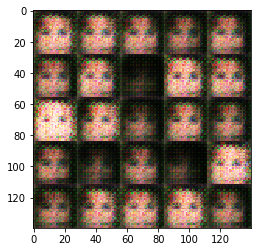

Epoch 1/1... Batch 210... Discriminator Loss: 0.2908... Generator Loss: 1.8731
Epoch 1/1... Batch 220... Discriminator Loss: 0.4174... Generator Loss: 1.4432
Epoch 1/1... Batch 230... Discriminator Loss: 0.3915... Generator Loss: 1.4129
Epoch 1/1... Batch 240... Discriminator Loss: 0.4450... Generator Loss: 1.4402
Epoch 1/1... Batch 250... Discriminator Loss: 1.2044... Generator Loss: 0.4905
Epoch 1/1... Batch 260... Discriminator Loss: 0.3902... Generator Loss: 2.2231
Epoch 1/1... Batch 270... Discriminator Loss: 0.9770... Generator Loss: 4.7790
Epoch 1/1... Batch 280... Discriminator Loss: 0.5380... Generator Loss: 1.3929
Epoch 1/1... Batch 290... Discriminator Loss: 0.6315... Generator Loss: 1.1294
Epoch 1/1... Batch 300... Discriminator Loss: 0.5908... Generator Loss: 3.0330


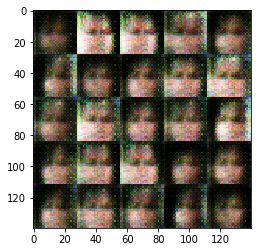

Epoch 1/1... Batch 310... Discriminator Loss: 0.9673... Generator Loss: 0.8182
Epoch 1/1... Batch 320... Discriminator Loss: 0.7733... Generator Loss: 1.1056
Epoch 1/1... Batch 330... Discriminator Loss: 1.4258... Generator Loss: 0.3932
Epoch 1/1... Batch 340... Discriminator Loss: 0.6669... Generator Loss: 1.3521
Epoch 1/1... Batch 350... Discriminator Loss: 0.9807... Generator Loss: 2.7746
Epoch 1/1... Batch 360... Discriminator Loss: 1.1939... Generator Loss: 0.7755
Epoch 1/1... Batch 370... Discriminator Loss: 1.0996... Generator Loss: 0.8092
Epoch 1/1... Batch 380... Discriminator Loss: 0.6316... Generator Loss: 1.5525
Epoch 1/1... Batch 390... Discriminator Loss: 0.8490... Generator Loss: 1.1502
Epoch 1/1... Batch 400... Discriminator Loss: 1.0111... Generator Loss: 1.4316


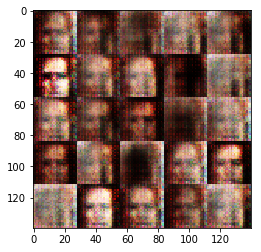

Epoch 1/1... Batch 410... Discriminator Loss: 0.8875... Generator Loss: 1.0953
Epoch 1/1... Batch 420... Discriminator Loss: 1.1100... Generator Loss: 0.7946
Epoch 1/1... Batch 430... Discriminator Loss: 0.9305... Generator Loss: 1.7474
Epoch 1/1... Batch 440... Discriminator Loss: 0.9014... Generator Loss: 1.0692
Epoch 1/1... Batch 450... Discriminator Loss: 0.8530... Generator Loss: 2.7600
Epoch 1/1... Batch 460... Discriminator Loss: 0.6917... Generator Loss: 1.5662
Epoch 1/1... Batch 470... Discriminator Loss: 0.4465... Generator Loss: 1.8645
Epoch 1/1... Batch 480... Discriminator Loss: 1.2542... Generator Loss: 0.6922
Epoch 1/1... Batch 490... Discriminator Loss: 0.5674... Generator Loss: 1.3899
Epoch 1/1... Batch 500... Discriminator Loss: 1.0345... Generator Loss: 1.6600


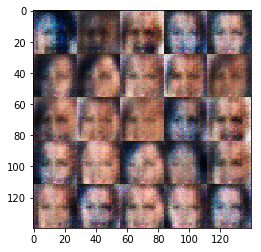

Epoch 1/1... Batch 510... Discriminator Loss: 1.4916... Generator Loss: 0.7447
Epoch 1/1... Batch 520... Discriminator Loss: 0.9676... Generator Loss: 0.8446
Epoch 1/1... Batch 530... Discriminator Loss: 0.6285... Generator Loss: 1.4326
Epoch 1/1... Batch 540... Discriminator Loss: 0.6526... Generator Loss: 1.6707
Epoch 1/1... Batch 550... Discriminator Loss: 0.7370... Generator Loss: 1.8273
Epoch 1/1... Batch 560... Discriminator Loss: 0.6355... Generator Loss: 1.6735
Epoch 1/1... Batch 570... Discriminator Loss: 0.7437... Generator Loss: 1.3361
Epoch 1/1... Batch 580... Discriminator Loss: 1.1912... Generator Loss: 0.7605
Epoch 1/1... Batch 590... Discriminator Loss: 0.9777... Generator Loss: 0.9791
Epoch 1/1... Batch 600... Discriminator Loss: 0.8652... Generator Loss: 1.4274


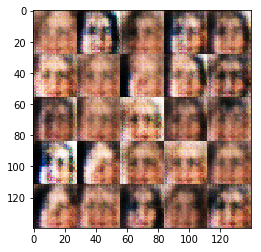

Epoch 1/1... Batch 610... Discriminator Loss: 1.2419... Generator Loss: 1.8527
Epoch 1/1... Batch 620... Discriminator Loss: 0.7934... Generator Loss: 1.2417
Epoch 1/1... Batch 630... Discriminator Loss: 1.1259... Generator Loss: 0.8610
Epoch 1/1... Batch 640... Discriminator Loss: 0.9017... Generator Loss: 1.2272
Epoch 1/1... Batch 650... Discriminator Loss: 0.9513... Generator Loss: 1.4182
Epoch 1/1... Batch 660... Discriminator Loss: 0.8474... Generator Loss: 1.1695
Epoch 1/1... Batch 670... Discriminator Loss: 0.7102... Generator Loss: 1.3051
Epoch 1/1... Batch 680... Discriminator Loss: 0.3922... Generator Loss: 1.9433
Epoch 1/1... Batch 690... Discriminator Loss: 0.8428... Generator Loss: 1.1241
Epoch 1/1... Batch 700... Discriminator Loss: 0.5984... Generator Loss: 1.5896


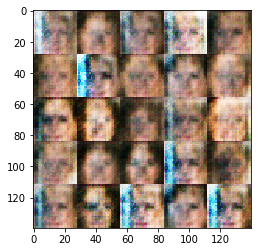

Epoch 1/1... Batch 710... Discriminator Loss: 0.9768... Generator Loss: 1.0998
Epoch 1/1... Batch 720... Discriminator Loss: 0.7239... Generator Loss: 1.5994
Epoch 1/1... Batch 730... Discriminator Loss: 0.8950... Generator Loss: 1.6202
Epoch 1/1... Batch 740... Discriminator Loss: 0.9555... Generator Loss: 0.8924
Epoch 1/1... Batch 750... Discriminator Loss: 1.0094... Generator Loss: 1.1750
Epoch 1/1... Batch 760... Discriminator Loss: 0.7677... Generator Loss: 1.2104
Epoch 1/1... Batch 770... Discriminator Loss: 1.0872... Generator Loss: 1.2058
Epoch 1/1... Batch 780... Discriminator Loss: 0.8584... Generator Loss: 0.9422
Epoch 1/1... Batch 790... Discriminator Loss: 0.6867... Generator Loss: 1.3427
Epoch 1/1... Batch 800... Discriminator Loss: 0.9817... Generator Loss: 0.7090


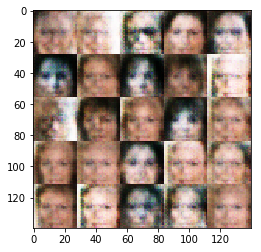

Epoch 1/1... Batch 810... Discriminator Loss: 0.6427... Generator Loss: 1.4451
Epoch 1/1... Batch 820... Discriminator Loss: 0.6358... Generator Loss: 1.8294
Epoch 1/1... Batch 830... Discriminator Loss: 0.8177... Generator Loss: 0.8552
Epoch 1/1... Batch 840... Discriminator Loss: 0.8671... Generator Loss: 1.2035
Epoch 1/1... Batch 850... Discriminator Loss: 0.5629... Generator Loss: 1.5265
Epoch 1/1... Batch 860... Discriminator Loss: 0.6720... Generator Loss: 1.3155
Epoch 1/1... Batch 870... Discriminator Loss: 0.6476... Generator Loss: 1.2219
Epoch 1/1... Batch 880... Discriminator Loss: 0.5405... Generator Loss: 2.0102
Epoch 1/1... Batch 890... Discriminator Loss: 0.5182... Generator Loss: 2.2445
Epoch 1/1... Batch 900... Discriminator Loss: 0.6616... Generator Loss: 1.2875


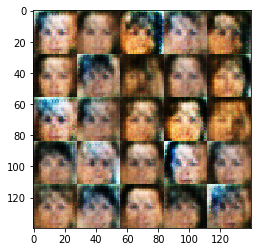

Epoch 1/1... Batch 910... Discriminator Loss: 1.2395... Generator Loss: 0.7378
Epoch 1/1... Batch 920... Discriminator Loss: 1.0702... Generator Loss: 0.7337
Epoch 1/1... Batch 930... Discriminator Loss: 0.5236... Generator Loss: 2.0578
Epoch 1/1... Batch 940... Discriminator Loss: 0.8071... Generator Loss: 1.6600
Epoch 1/1... Batch 950... Discriminator Loss: 1.0142... Generator Loss: 0.8498
Epoch 1/1... Batch 960... Discriminator Loss: 0.8562... Generator Loss: 0.9031
Epoch 1/1... Batch 970... Discriminator Loss: 0.7609... Generator Loss: 1.1737
Epoch 1/1... Batch 980... Discriminator Loss: 0.9602... Generator Loss: 0.8534
Epoch 1/1... Batch 990... Discriminator Loss: 1.0752... Generator Loss: 0.7829
Epoch 1/1... Batch 1000... Discriminator Loss: 1.1681... Generator Loss: 0.6252


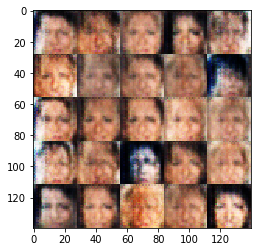

Epoch 1/1... Batch 1010... Discriminator Loss: 0.7253... Generator Loss: 1.4217
Epoch 1/1... Batch 1020... Discriminator Loss: 0.9992... Generator Loss: 0.7124
Epoch 1/1... Batch 1030... Discriminator Loss: 1.3996... Generator Loss: 0.4521
Epoch 1/1... Batch 1040... Discriminator Loss: 1.0310... Generator Loss: 0.8946
Epoch 1/1... Batch 1050... Discriminator Loss: 0.8026... Generator Loss: 1.0412
Epoch 1/1... Batch 1060... Discriminator Loss: 0.7797... Generator Loss: 1.8304
Epoch 1/1... Batch 1070... Discriminator Loss: 1.0795... Generator Loss: 3.3601
Epoch 1/1... Batch 1080... Discriminator Loss: 0.8903... Generator Loss: 0.9522
Epoch 1/1... Batch 1090... Discriminator Loss: 1.0082... Generator Loss: 1.5817
Epoch 1/1... Batch 1100... Discriminator Loss: 0.9995... Generator Loss: 0.9228


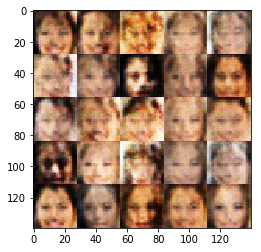

Epoch 1/1... Batch 1110... Discriminator Loss: 0.9599... Generator Loss: 1.1130
Epoch 1/1... Batch 1120... Discriminator Loss: 0.8203... Generator Loss: 1.4676
Epoch 1/1... Batch 1130... Discriminator Loss: 1.0537... Generator Loss: 0.9354
Epoch 1/1... Batch 1140... Discriminator Loss: 0.8721... Generator Loss: 1.2163
Epoch 1/1... Batch 1150... Discriminator Loss: 0.8043... Generator Loss: 1.3266
Epoch 1/1... Batch 1160... Discriminator Loss: 0.8408... Generator Loss: 1.3691
Epoch 1/1... Batch 1170... Discriminator Loss: 1.1249... Generator Loss: 0.9874
Epoch 1/1... Batch 1180... Discriminator Loss: 0.8557... Generator Loss: 1.3601
Epoch 1/1... Batch 1190... Discriminator Loss: 0.8982... Generator Loss: 0.8540
Epoch 1/1... Batch 1200... Discriminator Loss: 0.9888... Generator Loss: 0.6426


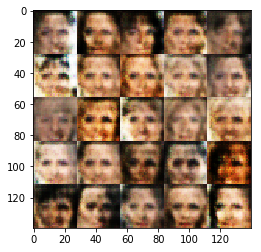

Epoch 1/1... Batch 1210... Discriminator Loss: 1.2612... Generator Loss: 1.5809
Epoch 1/1... Batch 1220... Discriminator Loss: 1.0717... Generator Loss: 0.9604
Epoch 1/1... Batch 1230... Discriminator Loss: 0.6941... Generator Loss: 1.7385
Epoch 1/1... Batch 1240... Discriminator Loss: 0.9086... Generator Loss: 1.1751
Epoch 1/1... Batch 1250... Discriminator Loss: 1.0526... Generator Loss: 1.1256
Epoch 1/1... Batch 1260... Discriminator Loss: 0.9583... Generator Loss: 0.8603
Epoch 1/1... Batch 1270... Discriminator Loss: 0.9897... Generator Loss: 0.8553
Epoch 1/1... Batch 1280... Discriminator Loss: 1.2591... Generator Loss: 0.9500
Epoch 1/1... Batch 1290... Discriminator Loss: 1.1531... Generator Loss: 1.0205
Epoch 1/1... Batch 1300... Discriminator Loss: 0.9987... Generator Loss: 1.2559


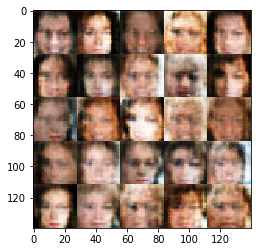

Epoch 1/1... Batch 1310... Discriminator Loss: 1.3338... Generator Loss: 1.0994
Epoch 1/1... Batch 1320... Discriminator Loss: 0.7820... Generator Loss: 1.0914
Epoch 1/1... Batch 1330... Discriminator Loss: 0.9735... Generator Loss: 1.0258
Epoch 1/1... Batch 1340... Discriminator Loss: 0.8383... Generator Loss: 1.4400
Epoch 1/1... Batch 1350... Discriminator Loss: 0.7551... Generator Loss: 1.3638
Epoch 1/1... Batch 1360... Discriminator Loss: 0.8784... Generator Loss: 1.5079
Epoch 1/1... Batch 1370... Discriminator Loss: 0.9618... Generator Loss: 0.8438
Epoch 1/1... Batch 1380... Discriminator Loss: 0.9723... Generator Loss: 0.8913
Epoch 1/1... Batch 1390... Discriminator Loss: 0.9456... Generator Loss: 0.9612
Epoch 1/1... Batch 1400... Discriminator Loss: 0.9165... Generator Loss: 1.4439


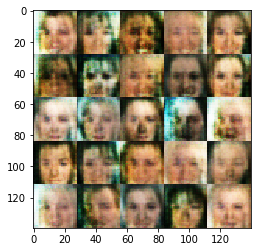

Epoch 1/1... Batch 1410... Discriminator Loss: 0.9195... Generator Loss: 1.0478
Epoch 1/1... Batch 1420... Discriminator Loss: 0.9670... Generator Loss: 1.1394
Epoch 1/1... Batch 1430... Discriminator Loss: 0.9360... Generator Loss: 1.0073
Epoch 1/1... Batch 1440... Discriminator Loss: 1.2558... Generator Loss: 0.6841
Epoch 1/1... Batch 1450... Discriminator Loss: 0.9773... Generator Loss: 1.3168
Epoch 1/1... Batch 1460... Discriminator Loss: 1.1109... Generator Loss: 0.8106
Epoch 1/1... Batch 1470... Discriminator Loss: 1.0294... Generator Loss: 0.9650
Epoch 1/1... Batch 1480... Discriminator Loss: 0.9479... Generator Loss: 0.9459
Epoch 1/1... Batch 1490... Discriminator Loss: 0.8043... Generator Loss: 0.9582
Epoch 1/1... Batch 1500... Discriminator Loss: 0.9930... Generator Loss: 0.8191


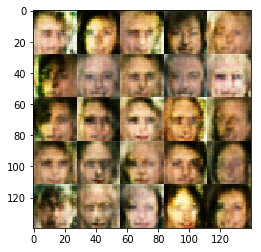

Epoch 1/1... Batch 1510... Discriminator Loss: 0.9986... Generator Loss: 0.8915
Epoch 1/1... Batch 1520... Discriminator Loss: 1.1507... Generator Loss: 0.7526
Epoch 1/1... Batch 1530... Discriminator Loss: 1.0918... Generator Loss: 0.9213
Epoch 1/1... Batch 1540... Discriminator Loss: 1.2433... Generator Loss: 0.6215
Epoch 1/1... Batch 1550... Discriminator Loss: 1.1144... Generator Loss: 0.8141
Epoch 1/1... Batch 1560... Discriminator Loss: 1.1121... Generator Loss: 1.0502
Epoch 1/1... Batch 1570... Discriminator Loss: 1.0099... Generator Loss: 1.1652
Epoch 1/1... Batch 1580... Discriminator Loss: 1.0348... Generator Loss: 0.7697
Epoch 1/1... Batch 1590... Discriminator Loss: 0.9839... Generator Loss: 0.8543
Epoch 1/1... Batch 1600... Discriminator Loss: 1.3448... Generator Loss: 0.4846


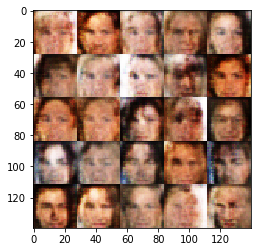

Epoch 1/1... Batch 1610... Discriminator Loss: 0.9912... Generator Loss: 0.7565
Epoch 1/1... Batch 1620... Discriminator Loss: 0.9854... Generator Loss: 0.8640
Epoch 1/1... Batch 1630... Discriminator Loss: 1.0079... Generator Loss: 0.8953
Epoch 1/1... Batch 1640... Discriminator Loss: 1.1944... Generator Loss: 0.5949
Epoch 1/1... Batch 1650... Discriminator Loss: 0.8433... Generator Loss: 1.0076
Epoch 1/1... Batch 1660... Discriminator Loss: 0.9877... Generator Loss: 1.0105
Epoch 1/1... Batch 1670... Discriminator Loss: 1.1893... Generator Loss: 0.6453
Epoch 1/1... Batch 1680... Discriminator Loss: 0.8878... Generator Loss: 0.9039
Epoch 1/1... Batch 1690... Discriminator Loss: 0.8143... Generator Loss: 0.9716
Epoch 1/1... Batch 1700... Discriminator Loss: 1.2409... Generator Loss: 0.6274


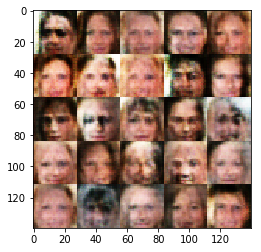

Epoch 1/1... Batch 1710... Discriminator Loss: 1.1378... Generator Loss: 0.9833
Epoch 1/1... Batch 1720... Discriminator Loss: 0.8871... Generator Loss: 0.9614
Epoch 1/1... Batch 1730... Discriminator Loss: 0.8015... Generator Loss: 1.1983
Epoch 1/1... Batch 1740... Discriminator Loss: 1.0843... Generator Loss: 1.2281
Epoch 1/1... Batch 1750... Discriminator Loss: 1.0427... Generator Loss: 0.8181
Epoch 1/1... Batch 1760... Discriminator Loss: 0.9864... Generator Loss: 1.0581
Epoch 1/1... Batch 1770... Discriminator Loss: 0.8610... Generator Loss: 1.2244
Epoch 1/1... Batch 1780... Discriminator Loss: 0.9194... Generator Loss: 0.9583
Epoch 1/1... Batch 1790... Discriminator Loss: 0.9677... Generator Loss: 1.1024
Epoch 1/1... Batch 1800... Discriminator Loss: 1.0631... Generator Loss: 1.0721


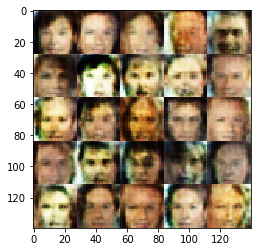

Epoch 1/1... Batch 1810... Discriminator Loss: 1.1847... Generator Loss: 0.7249
Epoch 1/1... Batch 1820... Discriminator Loss: 0.7766... Generator Loss: 1.0870
Epoch 1/1... Batch 1830... Discriminator Loss: 1.1015... Generator Loss: 1.3604
Epoch 1/1... Batch 1840... Discriminator Loss: 1.0569... Generator Loss: 1.4104
Epoch 1/1... Batch 1850... Discriminator Loss: 1.1813... Generator Loss: 0.6495
Epoch 1/1... Batch 1860... Discriminator Loss: 1.1838... Generator Loss: 0.6332
Epoch 1/1... Batch 1870... Discriminator Loss: 1.1333... Generator Loss: 0.6704
Epoch 1/1... Batch 1880... Discriminator Loss: 0.9243... Generator Loss: 1.1264
Epoch 1/1... Batch 1890... Discriminator Loss: 0.7611... Generator Loss: 1.1958
Epoch 1/1... Batch 1900... Discriminator Loss: 1.1260... Generator Loss: 1.2738


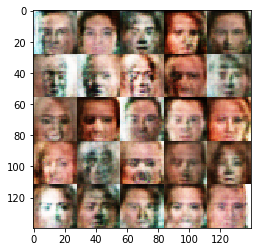

Epoch 1/1... Batch 1910... Discriminator Loss: 0.9720... Generator Loss: 1.3808
Epoch 1/1... Batch 1920... Discriminator Loss: 1.0625... Generator Loss: 1.1297
Epoch 1/1... Batch 1930... Discriminator Loss: 0.9674... Generator Loss: 1.0063
Epoch 1/1... Batch 1940... Discriminator Loss: 0.9667... Generator Loss: 0.7072
Epoch 1/1... Batch 1950... Discriminator Loss: 1.0029... Generator Loss: 1.0916
Epoch 1/1... Batch 1960... Discriminator Loss: 1.1144... Generator Loss: 0.9349
Epoch 1/1... Batch 1970... Discriminator Loss: 0.9670... Generator Loss: 1.0901
Epoch 1/1... Batch 1980... Discriminator Loss: 0.8439... Generator Loss: 1.1799
Epoch 1/1... Batch 1990... Discriminator Loss: 1.0059... Generator Loss: 0.9113
Epoch 1/1... Batch 2000... Discriminator Loss: 1.1656... Generator Loss: 0.9737


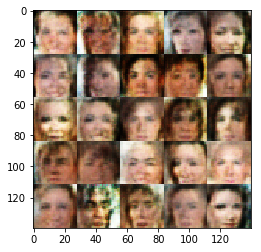

Epoch 1/1... Batch 2010... Discriminator Loss: 0.8651... Generator Loss: 1.1626
Epoch 1/1... Batch 2020... Discriminator Loss: 1.1101... Generator Loss: 1.4102
Epoch 1/1... Batch 2030... Discriminator Loss: 1.0324... Generator Loss: 0.9005
Epoch 1/1... Batch 2040... Discriminator Loss: 0.8949... Generator Loss: 1.0677
Epoch 1/1... Batch 2050... Discriminator Loss: 0.8985... Generator Loss: 0.9703
Epoch 1/1... Batch 2060... Discriminator Loss: 0.9174... Generator Loss: 0.9956
Epoch 1/1... Batch 2070... Discriminator Loss: 0.7153... Generator Loss: 1.3553
Epoch 1/1... Batch 2080... Discriminator Loss: 0.9341... Generator Loss: 1.6125
Epoch 1/1... Batch 2090... Discriminator Loss: 0.7819... Generator Loss: 1.1516
Epoch 1/1... Batch 2100... Discriminator Loss: 0.8744... Generator Loss: 1.3169


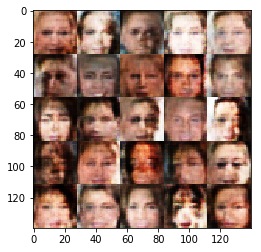

Epoch 1/1... Batch 2110... Discriminator Loss: 0.6920... Generator Loss: 1.3169
Epoch 1/1... Batch 2120... Discriminator Loss: 1.2780... Generator Loss: 0.5233
Epoch 1/1... Batch 2130... Discriminator Loss: 1.2018... Generator Loss: 0.6197
Epoch 1/1... Batch 2140... Discriminator Loss: 1.0920... Generator Loss: 0.6607
Epoch 1/1... Batch 2150... Discriminator Loss: 0.8387... Generator Loss: 1.0433
Epoch 1/1... Batch 2160... Discriminator Loss: 0.8703... Generator Loss: 1.3454
Epoch 1/1... Batch 2170... Discriminator Loss: 1.0233... Generator Loss: 0.6477
Epoch 1/1... Batch 2180... Discriminator Loss: 0.8999... Generator Loss: 1.1356
Epoch 1/1... Batch 2190... Discriminator Loss: 0.9590... Generator Loss: 1.0302
Epoch 1/1... Batch 2200... Discriminator Loss: 1.2859... Generator Loss: 1.7415


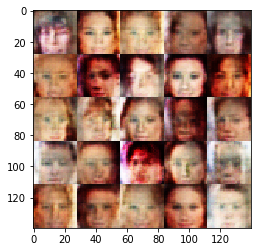

Epoch 1/1... Batch 2210... Discriminator Loss: 1.1088... Generator Loss: 1.0826
Epoch 1/1... Batch 2220... Discriminator Loss: 1.4944... Generator Loss: 0.5445
Epoch 1/1... Batch 2230... Discriminator Loss: 0.9970... Generator Loss: 1.1605
Epoch 1/1... Batch 2240... Discriminator Loss: 0.8442... Generator Loss: 1.0749
Epoch 1/1... Batch 2250... Discriminator Loss: 1.1841... Generator Loss: 0.5673
Epoch 1/1... Batch 2260... Discriminator Loss: 1.1214... Generator Loss: 0.8035
Epoch 1/1... Batch 2270... Discriminator Loss: 0.9726... Generator Loss: 1.2168
Epoch 1/1... Batch 2280... Discriminator Loss: 1.0985... Generator Loss: 0.6740
Epoch 1/1... Batch 2290... Discriminator Loss: 0.7858... Generator Loss: 1.0897
Epoch 1/1... Batch 2300... Discriminator Loss: 1.0411... Generator Loss: 1.1982


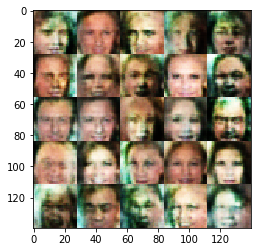

Epoch 1/1... Batch 2310... Discriminator Loss: 0.7008... Generator Loss: 1.5007
Epoch 1/1... Batch 2320... Discriminator Loss: 1.1173... Generator Loss: 0.7198
Epoch 1/1... Batch 2330... Discriminator Loss: 0.8613... Generator Loss: 1.1453
Epoch 1/1... Batch 2340... Discriminator Loss: 1.1669... Generator Loss: 0.7356
Epoch 1/1... Batch 2350... Discriminator Loss: 1.0507... Generator Loss: 0.8234
Epoch 1/1... Batch 2360... Discriminator Loss: 1.3008... Generator Loss: 0.4933
Epoch 1/1... Batch 2370... Discriminator Loss: 1.0502... Generator Loss: 1.1494
Epoch 1/1... Batch 2380... Discriminator Loss: 0.9337... Generator Loss: 1.1611
Epoch 1/1... Batch 2390... Discriminator Loss: 0.7542... Generator Loss: 1.3512
Epoch 1/1... Batch 2400... Discriminator Loss: 1.0757... Generator Loss: 1.1229


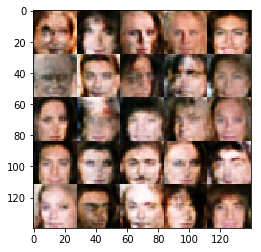

Epoch 1/1... Batch 2410... Discriminator Loss: 1.0344... Generator Loss: 0.7489
Epoch 1/1... Batch 2420... Discriminator Loss: 1.0245... Generator Loss: 0.9218
Epoch 1/1... Batch 2430... Discriminator Loss: 1.2296... Generator Loss: 0.6152
Epoch 1/1... Batch 2440... Discriminator Loss: 1.3140... Generator Loss: 0.5531
Epoch 1/1... Batch 2450... Discriminator Loss: 0.8699... Generator Loss: 1.3302
Epoch 1/1... Batch 2460... Discriminator Loss: 1.1806... Generator Loss: 0.6655
Epoch 1/1... Batch 2470... Discriminator Loss: 1.5613... Generator Loss: 0.4028
Epoch 1/1... Batch 2480... Discriminator Loss: 0.9391... Generator Loss: 1.2387
Epoch 1/1... Batch 2490... Discriminator Loss: 0.7843... Generator Loss: 1.2289
Epoch 1/1... Batch 2500... Discriminator Loss: 0.8455... Generator Loss: 1.2169


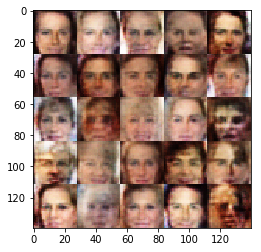

Epoch 1/1... Batch 2510... Discriminator Loss: 0.9952... Generator Loss: 1.1659
Epoch 1/1... Batch 2520... Discriminator Loss: 0.9652... Generator Loss: 0.9007
Epoch 1/1... Batch 2530... Discriminator Loss: 0.8020... Generator Loss: 1.5400
Epoch 1/1... Batch 2540... Discriminator Loss: 1.0722... Generator Loss: 0.7169
Epoch 1/1... Batch 2550... Discriminator Loss: 1.0316... Generator Loss: 0.7616
Epoch 1/1... Batch 2560... Discriminator Loss: 1.1246... Generator Loss: 1.1808
Epoch 1/1... Batch 2570... Discriminator Loss: 0.9998... Generator Loss: 0.9213
Epoch 1/1... Batch 2580... Discriminator Loss: 1.1145... Generator Loss: 0.7626
Epoch 1/1... Batch 2590... Discriminator Loss: 1.1883... Generator Loss: 0.5965
Epoch 1/1... Batch 2600... Discriminator Loss: 1.0449... Generator Loss: 0.7644


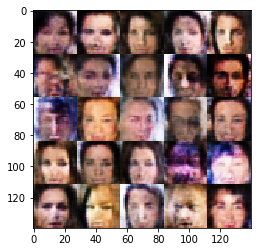

Epoch 1/1... Batch 2610... Discriminator Loss: 0.8654... Generator Loss: 1.0557
Epoch 1/1... Batch 2620... Discriminator Loss: 0.9697... Generator Loss: 1.1185
Epoch 1/1... Batch 2630... Discriminator Loss: 1.0232... Generator Loss: 0.9855
Epoch 1/1... Batch 2640... Discriminator Loss: 1.1938... Generator Loss: 0.7177
Epoch 1/1... Batch 2650... Discriminator Loss: 1.1070... Generator Loss: 0.7516
Epoch 1/1... Batch 2660... Discriminator Loss: 0.8806... Generator Loss: 0.9858
Epoch 1/1... Batch 2670... Discriminator Loss: 0.9737... Generator Loss: 1.0176
Epoch 1/1... Batch 2680... Discriminator Loss: 0.9271... Generator Loss: 0.8887
Epoch 1/1... Batch 2690... Discriminator Loss: 0.7996... Generator Loss: 1.0644
Epoch 1/1... Batch 2700... Discriminator Loss: 1.2327... Generator Loss: 1.3782


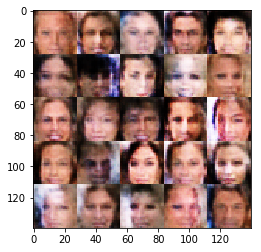

Epoch 1/1... Batch 2710... Discriminator Loss: 1.0265... Generator Loss: 1.0372
Epoch 1/1... Batch 2720... Discriminator Loss: 0.8989... Generator Loss: 1.5529
Epoch 1/1... Batch 2730... Discriminator Loss: 0.7142... Generator Loss: 1.4670
Epoch 1/1... Batch 2740... Discriminator Loss: 0.8480... Generator Loss: 1.5576
Epoch 1/1... Batch 2750... Discriminator Loss: 0.8846... Generator Loss: 1.6181
Epoch 1/1... Batch 2760... Discriminator Loss: 1.0545... Generator Loss: 0.7681
Epoch 1/1... Batch 2770... Discriminator Loss: 0.9005... Generator Loss: 1.2162
Epoch 1/1... Batch 2780... Discriminator Loss: 0.8671... Generator Loss: 0.9302
Epoch 1/1... Batch 2790... Discriminator Loss: 0.8323... Generator Loss: 1.2125
Epoch 1/1... Batch 2800... Discriminator Loss: 1.0377... Generator Loss: 0.8726


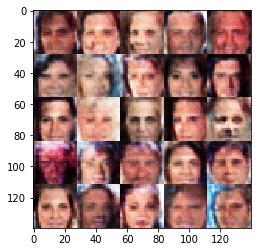

Epoch 1/1... Batch 2810... Discriminator Loss: 1.0762... Generator Loss: 0.9032
Epoch 1/1... Batch 2820... Discriminator Loss: 0.9878... Generator Loss: 1.1163
Epoch 1/1... Batch 2830... Discriminator Loss: 0.8656... Generator Loss: 1.0874
Epoch 1/1... Batch 2840... Discriminator Loss: 0.9261... Generator Loss: 1.0842
Epoch 1/1... Batch 2850... Discriminator Loss: 0.7413... Generator Loss: 1.1912
Epoch 1/1... Batch 2860... Discriminator Loss: 1.0869... Generator Loss: 0.8950
Epoch 1/1... Batch 2870... Discriminator Loss: 0.6709... Generator Loss: 1.3661
Epoch 1/1... Batch 2880... Discriminator Loss: 0.9500... Generator Loss: 0.7103
Epoch 1/1... Batch 2890... Discriminator Loss: 0.9349... Generator Loss: 1.1612
Epoch 1/1... Batch 2900... Discriminator Loss: 0.7848... Generator Loss: 1.1697


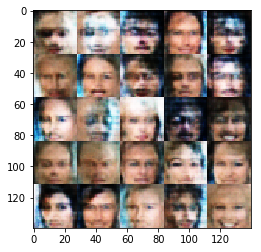

Epoch 1/1... Batch 2910... Discriminator Loss: 1.0013... Generator Loss: 1.2638
Epoch 1/1... Batch 2920... Discriminator Loss: 0.9961... Generator Loss: 0.9415
Epoch 1/1... Batch 2930... Discriminator Loss: 0.8044... Generator Loss: 1.0655
Epoch 1/1... Batch 2940... Discriminator Loss: 0.8216... Generator Loss: 1.1598
Epoch 1/1... Batch 2950... Discriminator Loss: 0.9328... Generator Loss: 1.0691
Epoch 1/1... Batch 2960... Discriminator Loss: 1.2786... Generator Loss: 0.4822
Epoch 1/1... Batch 2970... Discriminator Loss: 1.1715... Generator Loss: 0.9440
Epoch 1/1... Batch 2980... Discriminator Loss: 0.6732... Generator Loss: 1.7570
Epoch 1/1... Batch 2990... Discriminator Loss: 1.4307... Generator Loss: 0.4701
Epoch 1/1... Batch 3000... Discriminator Loss: 1.2315... Generator Loss: 0.5713


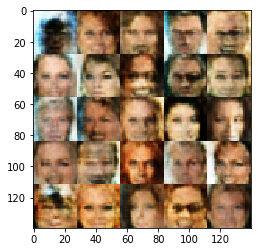

Epoch 1/1... Batch 3010... Discriminator Loss: 1.0584... Generator Loss: 0.8371
Epoch 1/1... Batch 3020... Discriminator Loss: 0.8836... Generator Loss: 0.8437
Epoch 1/1... Batch 3030... Discriminator Loss: 1.0168... Generator Loss: 0.8146
Epoch 1/1... Batch 3040... Discriminator Loss: 1.0102... Generator Loss: 0.9832
Epoch 1/1... Batch 3050... Discriminator Loss: 0.8539... Generator Loss: 1.2124
Epoch 1/1... Batch 3060... Discriminator Loss: 0.9186... Generator Loss: 0.9858
Epoch 1/1... Batch 3070... Discriminator Loss: 0.9709... Generator Loss: 1.0836
Epoch 1/1... Batch 3080... Discriminator Loss: 0.6559... Generator Loss: 1.3357
Epoch 1/1... Batch 3090... Discriminator Loss: 1.0881... Generator Loss: 0.7335
Epoch 1/1... Batch 3100... Discriminator Loss: 0.9449... Generator Loss: 0.8724


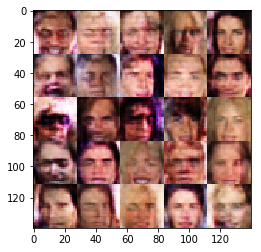

Epoch 1/1... Batch 3110... Discriminator Loss: 1.0318... Generator Loss: 1.0890
Epoch 1/1... Batch 3120... Discriminator Loss: 0.9943... Generator Loss: 1.2384
Epoch 1/1... Batch 3130... Discriminator Loss: 0.9206... Generator Loss: 0.8734
Epoch 1/1... Batch 3140... Discriminator Loss: 0.8485... Generator Loss: 1.1134
Epoch 1/1... Batch 3150... Discriminator Loss: 1.0683... Generator Loss: 0.7528
Epoch 1/1... Batch 3160... Discriminator Loss: 0.8739... Generator Loss: 0.8704
Epoch 1/1... Batch 3170... Discriminator Loss: 1.1440... Generator Loss: 0.7058
Epoch 1/1... Batch 3180... Discriminator Loss: 1.1204... Generator Loss: 0.6413
Epoch 1/1... Batch 3190... Discriminator Loss: 0.9632... Generator Loss: 0.7245
Epoch 1/1... Batch 3200... Discriminator Loss: 0.8411... Generator Loss: 1.1516


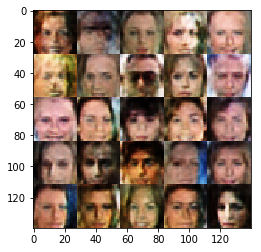

Epoch 1/1... Batch 3210... Discriminator Loss: 0.9030... Generator Loss: 0.8928
Epoch 1/1... Batch 3220... Discriminator Loss: 1.0602... Generator Loss: 0.8972
Epoch 1/1... Batch 3230... Discriminator Loss: 0.8908... Generator Loss: 0.9522
Epoch 1/1... Batch 3240... Discriminator Loss: 0.8388... Generator Loss: 0.9677
Epoch 1/1... Batch 3250... Discriminator Loss: 1.0991... Generator Loss: 1.1086
Epoch 1/1... Batch 3260... Discriminator Loss: 1.0235... Generator Loss: 1.1542
Epoch 1/1... Batch 3270... Discriminator Loss: 0.8813... Generator Loss: 1.0209
Epoch 1/1... Batch 3280... Discriminator Loss: 1.1505... Generator Loss: 0.6590
Epoch 1/1... Batch 3290... Discriminator Loss: 1.0740... Generator Loss: 0.8857
Epoch 1/1... Batch 3300... Discriminator Loss: 1.3031... Generator Loss: 0.5797


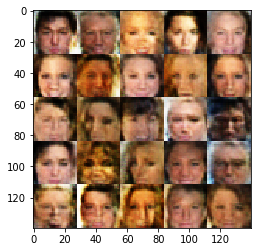

Epoch 1/1... Batch 3310... Discriminator Loss: 1.0756... Generator Loss: 0.6549
Epoch 1/1... Batch 3320... Discriminator Loss: 0.8056... Generator Loss: 1.0239
Epoch 1/1... Batch 3330... Discriminator Loss: 1.0544... Generator Loss: 1.2559
Epoch 1/1... Batch 3340... Discriminator Loss: 0.7484... Generator Loss: 1.3092
Epoch 1/1... Batch 3350... Discriminator Loss: 1.1071... Generator Loss: 0.7660
Epoch 1/1... Batch 3360... Discriminator Loss: 0.9328... Generator Loss: 0.9139
Epoch 1/1... Batch 3370... Discriminator Loss: 1.1652... Generator Loss: 0.6068
Epoch 1/1... Batch 3380... Discriminator Loss: 1.0903... Generator Loss: 0.6210
Epoch 1/1... Batch 3390... Discriminator Loss: 0.7810... Generator Loss: 1.2481
Epoch 1/1... Batch 3400... Discriminator Loss: 1.1871... Generator Loss: 0.6526


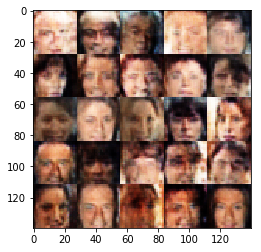

Epoch 1/1... Batch 3410... Discriminator Loss: 1.2290... Generator Loss: 0.5664
Epoch 1/1... Batch 3420... Discriminator Loss: 0.7826... Generator Loss: 1.0689
Epoch 1/1... Batch 3430... Discriminator Loss: 0.8387... Generator Loss: 0.9782
Epoch 1/1... Batch 3440... Discriminator Loss: 0.7734... Generator Loss: 1.2843
Epoch 1/1... Batch 3450... Discriminator Loss: 0.8751... Generator Loss: 0.8681
Epoch 1/1... Batch 3460... Discriminator Loss: 0.8519... Generator Loss: 0.9203
Epoch 1/1... Batch 3470... Discriminator Loss: 0.8558... Generator Loss: 1.4495
Epoch 1/1... Batch 3480... Discriminator Loss: 0.8434... Generator Loss: 1.1446
Epoch 1/1... Batch 3490... Discriminator Loss: 0.7334... Generator Loss: 1.2093
Epoch 1/1... Batch 3500... Discriminator Loss: 1.0416... Generator Loss: 1.0660


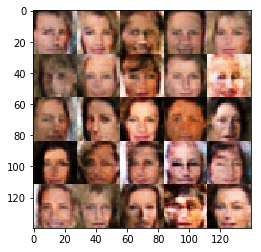

Epoch 1/1... Batch 3510... Discriminator Loss: 0.9025... Generator Loss: 0.7715
Epoch 1/1... Batch 3520... Discriminator Loss: 1.1152... Generator Loss: 0.6497
Epoch 1/1... Batch 3530... Discriminator Loss: 1.0402... Generator Loss: 1.0479
Epoch 1/1... Batch 3540... Discriminator Loss: 1.1499... Generator Loss: 0.6435
Epoch 1/1... Batch 3550... Discriminator Loss: 0.9946... Generator Loss: 0.9403
Epoch 1/1... Batch 3560... Discriminator Loss: 0.7508... Generator Loss: 1.3201
Epoch 1/1... Batch 3570... Discriminator Loss: 0.8336... Generator Loss: 1.1806
Epoch 1/1... Batch 3580... Discriminator Loss: 1.1351... Generator Loss: 0.6988
Epoch 1/1... Batch 3590... Discriminator Loss: 1.0577... Generator Loss: 0.9632
Epoch 1/1... Batch 3600... Discriminator Loss: 1.1365... Generator Loss: 0.8941


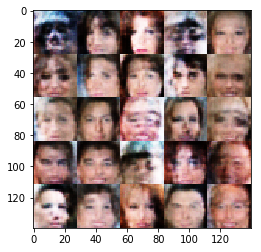

Epoch 1/1... Batch 3610... Discriminator Loss: 1.1269... Generator Loss: 0.5541
Epoch 1/1... Batch 3620... Discriminator Loss: 1.0457... Generator Loss: 0.7567
Epoch 1/1... Batch 3630... Discriminator Loss: 1.4585... Generator Loss: 0.3631
Epoch 1/1... Batch 3640... Discriminator Loss: 0.7505... Generator Loss: 1.3080
Epoch 1/1... Batch 3650... Discriminator Loss: 1.0715... Generator Loss: 0.6676
Epoch 1/1... Batch 3660... Discriminator Loss: 0.9050... Generator Loss: 1.3904
Epoch 1/1... Batch 3670... Discriminator Loss: 1.2484... Generator Loss: 0.9505
Epoch 1/1... Batch 3680... Discriminator Loss: 0.8076... Generator Loss: 0.9669
Epoch 1/1... Batch 3690... Discriminator Loss: 0.9371... Generator Loss: 0.8489
Epoch 1/1... Batch 3700... Discriminator Loss: 0.7301... Generator Loss: 1.1106


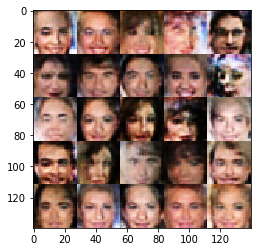

Epoch 1/1... Batch 3710... Discriminator Loss: 1.2645... Generator Loss: 0.6470
Epoch 1/1... Batch 3720... Discriminator Loss: 1.1877... Generator Loss: 1.0741
Epoch 1/1... Batch 3730... Discriminator Loss: 0.8699... Generator Loss: 1.6396
Epoch 1/1... Batch 3740... Discriminator Loss: 0.9605... Generator Loss: 1.2592
Epoch 1/1... Batch 3750... Discriminator Loss: 1.1077... Generator Loss: 0.6986
Epoch 1/1... Batch 3760... Discriminator Loss: 0.9781... Generator Loss: 0.6783
Epoch 1/1... Batch 3770... Discriminator Loss: 0.7948... Generator Loss: 1.0820
Epoch 1/1... Batch 3780... Discriminator Loss: 1.0088... Generator Loss: 1.0069
Epoch 1/1... Batch 3790... Discriminator Loss: 0.8555... Generator Loss: 1.0871
Epoch 1/1... Batch 3800... Discriminator Loss: 1.0558... Generator Loss: 0.8779


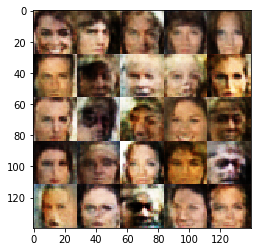

Epoch 1/1... Batch 3810... Discriminator Loss: 1.0665... Generator Loss: 0.6038
Epoch 1/1... Batch 3820... Discriminator Loss: 1.0097... Generator Loss: 1.2533
Epoch 1/1... Batch 3830... Discriminator Loss: 1.0473... Generator Loss: 0.7157
Epoch 1/1... Batch 3840... Discriminator Loss: 1.0262... Generator Loss: 0.7778
Epoch 1/1... Batch 3850... Discriminator Loss: 0.9847... Generator Loss: 0.8396
Epoch 1/1... Batch 3860... Discriminator Loss: 1.2507... Generator Loss: 0.5076
Epoch 1/1... Batch 3870... Discriminator Loss: 0.8698... Generator Loss: 1.0273
Epoch 1/1... Batch 3880... Discriminator Loss: 1.1463... Generator Loss: 0.7500
Epoch 1/1... Batch 3890... Discriminator Loss: 1.0149... Generator Loss: 0.9081
Epoch 1/1... Batch 3900... Discriminator Loss: 0.9835... Generator Loss: 1.2377


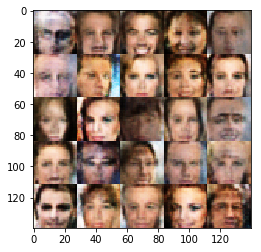

Epoch 1/1... Batch 3910... Discriminator Loss: 1.0455... Generator Loss: 1.0319
Epoch 1/1... Batch 3920... Discriminator Loss: 1.0327... Generator Loss: 0.7734
Epoch 1/1... Batch 3930... Discriminator Loss: 1.0436... Generator Loss: 0.7186
Epoch 1/1... Batch 3940... Discriminator Loss: 0.7730... Generator Loss: 1.2451
Epoch 1/1... Batch 3950... Discriminator Loss: 1.1244... Generator Loss: 0.5650
Epoch 1/1... Batch 3960... Discriminator Loss: 0.9790... Generator Loss: 0.8106
Epoch 1/1... Batch 3970... Discriminator Loss: 0.7818... Generator Loss: 1.0124
Epoch 1/1... Batch 3980... Discriminator Loss: 1.1599... Generator Loss: 0.6543
Epoch 1/1... Batch 3990... Discriminator Loss: 1.2104... Generator Loss: 1.5430
Epoch 1/1... Batch 4000... Discriminator Loss: 1.0938... Generator Loss: 0.7259


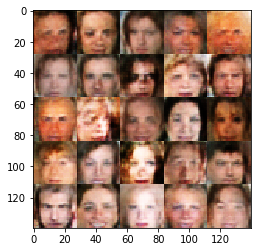

Epoch 1/1... Batch 4010... Discriminator Loss: 0.9423... Generator Loss: 1.0198
Epoch 1/1... Batch 4020... Discriminator Loss: 0.8392... Generator Loss: 1.0143
Epoch 1/1... Batch 4030... Discriminator Loss: 1.0113... Generator Loss: 0.7296
Epoch 1/1... Batch 4040... Discriminator Loss: 1.0952... Generator Loss: 0.6974
Epoch 1/1... Batch 4050... Discriminator Loss: 0.8314... Generator Loss: 1.1865
Epoch 1/1... Batch 4060... Discriminator Loss: 1.0200... Generator Loss: 0.7594
Epoch 1/1... Batch 4070... Discriminator Loss: 1.0606... Generator Loss: 1.0809
Epoch 1/1... Batch 4080... Discriminator Loss: 0.9961... Generator Loss: 0.9588
Epoch 1/1... Batch 4090... Discriminator Loss: 0.8269... Generator Loss: 1.4889
Epoch 1/1... Batch 4100... Discriminator Loss: 1.1828... Generator Loss: 0.7017


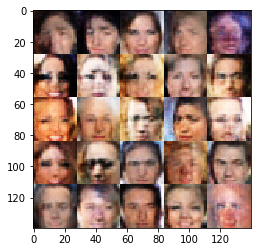

Epoch 1/1... Batch 4110... Discriminator Loss: 1.3129... Generator Loss: 0.4893
Epoch 1/1... Batch 4120... Discriminator Loss: 1.1165... Generator Loss: 0.6384
Epoch 1/1... Batch 4130... Discriminator Loss: 0.9670... Generator Loss: 1.5121
Epoch 1/1... Batch 4140... Discriminator Loss: 0.9812... Generator Loss: 1.0218
Epoch 1/1... Batch 4150... Discriminator Loss: 1.0371... Generator Loss: 0.6990
Epoch 1/1... Batch 4160... Discriminator Loss: 0.8182... Generator Loss: 1.0588
Epoch 1/1... Batch 4170... Discriminator Loss: 1.0091... Generator Loss: 1.0470
Epoch 1/1... Batch 4180... Discriminator Loss: 1.1540... Generator Loss: 0.5765
Epoch 1/1... Batch 4190... Discriminator Loss: 1.0385... Generator Loss: 0.7278
Epoch 1/1... Batch 4200... Discriminator Loss: 0.8651... Generator Loss: 0.9703


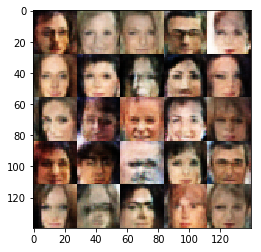

Epoch 1/1... Batch 4210... Discriminator Loss: 1.5123... Generator Loss: 0.3683
Epoch 1/1... Batch 4220... Discriminator Loss: 0.7743... Generator Loss: 1.0048
Epoch 1/1... Batch 4230... Discriminator Loss: 1.0066... Generator Loss: 0.8936
Epoch 1/1... Batch 4240... Discriminator Loss: 0.7192... Generator Loss: 1.5718
Epoch 1/1... Batch 4250... Discriminator Loss: 1.0629... Generator Loss: 0.6677
Epoch 1/1... Batch 4260... Discriminator Loss: 0.9192... Generator Loss: 1.1069
Epoch 1/1... Batch 4270... Discriminator Loss: 0.7278... Generator Loss: 1.4614
Epoch 1/1... Batch 4280... Discriminator Loss: 1.0606... Generator Loss: 0.6321
Epoch 1/1... Batch 4290... Discriminator Loss: 0.9988... Generator Loss: 0.7624
Epoch 1/1... Batch 4300... Discriminator Loss: 0.9715... Generator Loss: 0.8976


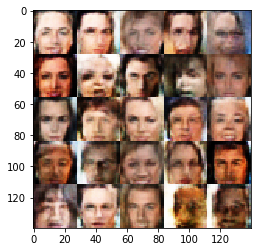

Epoch 1/1... Batch 4310... Discriminator Loss: 1.0726... Generator Loss: 0.6371
Epoch 1/1... Batch 4320... Discriminator Loss: 1.1380... Generator Loss: 0.7606
Epoch 1/1... Batch 4330... Discriminator Loss: 0.8893... Generator Loss: 1.1760
Epoch 1/1... Batch 4340... Discriminator Loss: 0.8889... Generator Loss: 1.0463
Epoch 1/1... Batch 4350... Discriminator Loss: 0.9606... Generator Loss: 1.0555
Epoch 1/1... Batch 4360... Discriminator Loss: 1.0708... Generator Loss: 0.8025
Epoch 1/1... Batch 4370... Discriminator Loss: 1.0809... Generator Loss: 0.6550
Epoch 1/1... Batch 4380... Discriminator Loss: 1.2083... Generator Loss: 0.5724
Epoch 1/1... Batch 4390... Discriminator Loss: 0.5484... Generator Loss: 1.8211
Epoch 1/1... Batch 4400... Discriminator Loss: 1.0521... Generator Loss: 0.7098


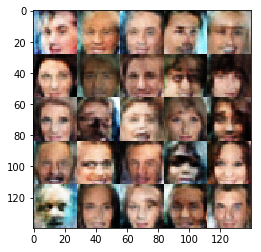

Epoch 1/1... Batch 4410... Discriminator Loss: 1.1775... Generator Loss: 0.6332
Epoch 1/1... Batch 4420... Discriminator Loss: 0.8464... Generator Loss: 0.9725
Epoch 1/1... Batch 4430... Discriminator Loss: 0.9598... Generator Loss: 0.8263
Epoch 1/1... Batch 4440... Discriminator Loss: 0.9844... Generator Loss: 0.7944
Epoch 1/1... Batch 4450... Discriminator Loss: 1.0288... Generator Loss: 0.8282
Epoch 1/1... Batch 4460... Discriminator Loss: 1.1613... Generator Loss: 0.6586
Epoch 1/1... Batch 4470... Discriminator Loss: 0.7194... Generator Loss: 1.1387
Epoch 1/1... Batch 4480... Discriminator Loss: 1.2053... Generator Loss: 0.5771
Epoch 1/1... Batch 4490... Discriminator Loss: 0.8383... Generator Loss: 0.9120
Epoch 1/1... Batch 4500... Discriminator Loss: 1.2411... Generator Loss: 0.7988


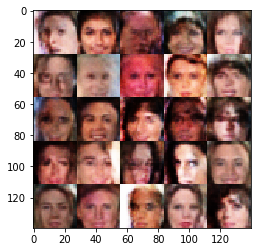

Epoch 1/1... Batch 4510... Discriminator Loss: 0.8847... Generator Loss: 1.3497
Epoch 1/1... Batch 4520... Discriminator Loss: 0.9886... Generator Loss: 1.0226
Epoch 1/1... Batch 4530... Discriminator Loss: 1.0303... Generator Loss: 1.0768
Epoch 1/1... Batch 4540... Discriminator Loss: 0.8834... Generator Loss: 0.9247
Epoch 1/1... Batch 4550... Discriminator Loss: 0.9647... Generator Loss: 0.9978
Epoch 1/1... Batch 4560... Discriminator Loss: 0.6735... Generator Loss: 1.1472
Epoch 1/1... Batch 4570... Discriminator Loss: 0.8865... Generator Loss: 0.9209
Epoch 1/1... Batch 4580... Discriminator Loss: 1.3017... Generator Loss: 0.5445
Epoch 1/1... Batch 4590... Discriminator Loss: 1.0029... Generator Loss: 0.6292
Epoch 1/1... Batch 4600... Discriminator Loss: 0.9429... Generator Loss: 0.8816


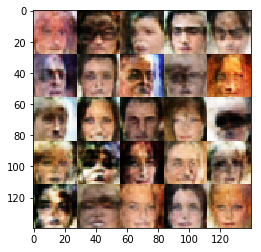

Epoch 1/1... Batch 4610... Discriminator Loss: 0.6500... Generator Loss: 1.4167
Epoch 1/1... Batch 4620... Discriminator Loss: 1.2633... Generator Loss: 0.4896
Epoch 1/1... Batch 4630... Discriminator Loss: 1.0026... Generator Loss: 0.9558
Epoch 1/1... Batch 4640... Discriminator Loss: 1.0276... Generator Loss: 0.7828
Epoch 1/1... Batch 4650... Discriminator Loss: 1.0185... Generator Loss: 0.8051
Epoch 1/1... Batch 4660... Discriminator Loss: 0.9406... Generator Loss: 1.1974
Epoch 1/1... Batch 4670... Discriminator Loss: 1.0328... Generator Loss: 1.0099
Epoch 1/1... Batch 4680... Discriminator Loss: 1.1853... Generator Loss: 0.6812
Epoch 1/1... Batch 4690... Discriminator Loss: 0.8898... Generator Loss: 1.1351
Epoch 1/1... Batch 4700... Discriminator Loss: 1.2135... Generator Loss: 0.5263


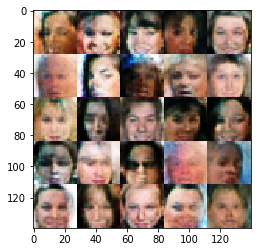

Epoch 1/1... Batch 4710... Discriminator Loss: 0.8739... Generator Loss: 1.0766
Epoch 1/1... Batch 4720... Discriminator Loss: 0.9442... Generator Loss: 0.7608
Epoch 1/1... Batch 4730... Discriminator Loss: 1.0910... Generator Loss: 0.6922
Epoch 1/1... Batch 4740... Discriminator Loss: 1.0884... Generator Loss: 0.7171
Epoch 1/1... Batch 4750... Discriminator Loss: 1.4525... Generator Loss: 0.5645
Epoch 1/1... Batch 4760... Discriminator Loss: 1.0245... Generator Loss: 0.6965
Epoch 1/1... Batch 4770... Discriminator Loss: 1.1664... Generator Loss: 0.6884
Epoch 1/1... Batch 4780... Discriminator Loss: 0.7399... Generator Loss: 1.2030
Epoch 1/1... Batch 4790... Discriminator Loss: 1.2186... Generator Loss: 0.5226
Epoch 1/1... Batch 4800... Discriminator Loss: 0.7535... Generator Loss: 1.4198


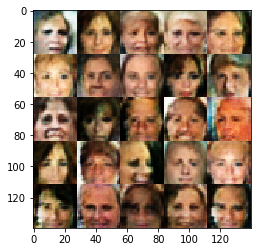

Epoch 1/1... Batch 4810... Discriminator Loss: 1.0612... Generator Loss: 0.8622
Epoch 1/1... Batch 4820... Discriminator Loss: 0.8662... Generator Loss: 0.8767
Epoch 1/1... Batch 4830... Discriminator Loss: 0.9578... Generator Loss: 1.0510
Epoch 1/1... Batch 4840... Discriminator Loss: 0.7567... Generator Loss: 1.2009
Epoch 1/1... Batch 4850... Discriminator Loss: 0.9529... Generator Loss: 1.1518
Epoch 1/1... Batch 4860... Discriminator Loss: 0.9286... Generator Loss: 0.7508
Epoch 1/1... Batch 4870... Discriminator Loss: 1.1438... Generator Loss: 0.6404
Epoch 1/1... Batch 4880... Discriminator Loss: 1.1980... Generator Loss: 0.5627
Epoch 1/1... Batch 4890... Discriminator Loss: 0.9897... Generator Loss: 0.9949
Epoch 1/1... Batch 4900... Discriminator Loss: 1.3222... Generator Loss: 1.1291


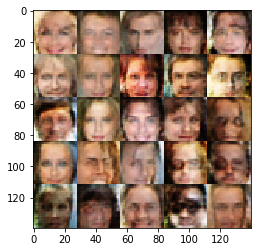

Epoch 1/1... Batch 4910... Discriminator Loss: 0.9038... Generator Loss: 1.2208
Epoch 1/1... Batch 4920... Discriminator Loss: 1.0118... Generator Loss: 0.7173
Epoch 1/1... Batch 4930... Discriminator Loss: 1.0227... Generator Loss: 0.9426
Epoch 1/1... Batch 4940... Discriminator Loss: 1.3023... Generator Loss: 0.5597
Epoch 1/1... Batch 4950... Discriminator Loss: 0.8700... Generator Loss: 0.9307
Epoch 1/1... Batch 4960... Discriminator Loss: 1.1492... Generator Loss: 0.7397
Epoch 1/1... Batch 4970... Discriminator Loss: 0.8906... Generator Loss: 0.9272
Epoch 1/1... Batch 4980... Discriminator Loss: 0.8975... Generator Loss: 1.0069
Epoch 1/1... Batch 4990... Discriminator Loss: 1.2728... Generator Loss: 0.7216
Epoch 1/1... Batch 5000... Discriminator Loss: 0.8021... Generator Loss: 1.1269


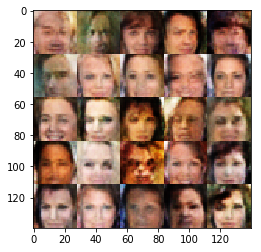

Epoch 1/1... Batch 5010... Discriminator Loss: 1.2884... Generator Loss: 0.5352
Epoch 1/1... Batch 5020... Discriminator Loss: 0.8994... Generator Loss: 1.4739
Epoch 1/1... Batch 5030... Discriminator Loss: 1.3455... Generator Loss: 0.6931
Epoch 1/1... Batch 5040... Discriminator Loss: 1.0021... Generator Loss: 1.0028
Epoch 1/1... Batch 5050... Discriminator Loss: 0.9397... Generator Loss: 0.8440
Epoch 1/1... Batch 5060... Discriminator Loss: 0.9494... Generator Loss: 1.1951
Epoch 1/1... Batch 5070... Discriminator Loss: 0.9861... Generator Loss: 0.9155
Epoch 1/1... Batch 5080... Discriminator Loss: 0.8206... Generator Loss: 1.1220
Epoch 1/1... Batch 5090... Discriminator Loss: 0.9983... Generator Loss: 0.8720
Epoch 1/1... Batch 5100... Discriminator Loss: 1.0172... Generator Loss: 0.8188


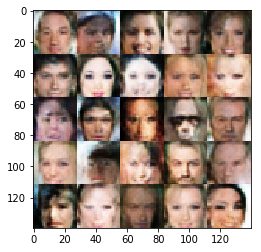

Epoch 1/1... Batch 5110... Discriminator Loss: 0.9294... Generator Loss: 0.9515
Epoch 1/1... Batch 5120... Discriminator Loss: 1.0045... Generator Loss: 1.0726
Epoch 1/1... Batch 5130... Discriminator Loss: 1.1745... Generator Loss: 0.5023
Epoch 1/1... Batch 5140... Discriminator Loss: 0.9994... Generator Loss: 0.8321
Epoch 1/1... Batch 5150... Discriminator Loss: 1.2434... Generator Loss: 0.6466
Epoch 1/1... Batch 5160... Discriminator Loss: 1.2244... Generator Loss: 0.6074
Epoch 1/1... Batch 5170... Discriminator Loss: 0.9458... Generator Loss: 0.6916
Epoch 1/1... Batch 5180... Discriminator Loss: 1.0725... Generator Loss: 1.1019
Epoch 1/1... Batch 5190... Discriminator Loss: 0.9607... Generator Loss: 0.6873
Epoch 1/1... Batch 5200... Discriminator Loss: 1.0883... Generator Loss: 0.8350


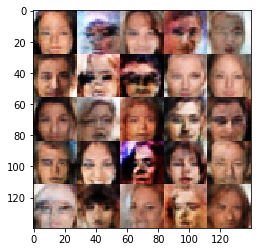

Epoch 1/1... Batch 5210... Discriminator Loss: 1.1519... Generator Loss: 0.6448
Epoch 1/1... Batch 5220... Discriminator Loss: 1.2224... Generator Loss: 0.5299
Epoch 1/1... Batch 5230... Discriminator Loss: 1.0617... Generator Loss: 0.9391
Epoch 1/1... Batch 5240... Discriminator Loss: 1.0539... Generator Loss: 0.6325
Epoch 1/1... Batch 5250... Discriminator Loss: 0.7605... Generator Loss: 1.0880
Epoch 1/1... Batch 5260... Discriminator Loss: 1.3207... Generator Loss: 0.7145
Epoch 1/1... Batch 5270... Discriminator Loss: 0.6766... Generator Loss: 1.5677
Epoch 1/1... Batch 5280... Discriminator Loss: 0.7392... Generator Loss: 1.4754
Epoch 1/1... Batch 5290... Discriminator Loss: 0.8162... Generator Loss: 0.8248
Epoch 1/1... Batch 5300... Discriminator Loss: 0.7641... Generator Loss: 1.4368


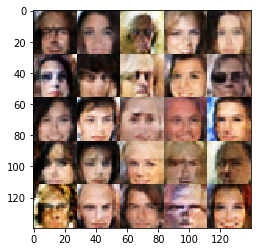

Epoch 1/1... Batch 5310... Discriminator Loss: 0.9129... Generator Loss: 1.0084
Epoch 1/1... Batch 5320... Discriminator Loss: 0.8619... Generator Loss: 0.8594
Epoch 1/1... Batch 5330... Discriminator Loss: 0.5782... Generator Loss: 1.3205
Epoch 1/1... Batch 5340... Discriminator Loss: 0.9603... Generator Loss: 0.9160
Epoch 1/1... Batch 5350... Discriminator Loss: 1.0884... Generator Loss: 1.7313
Epoch 1/1... Batch 5360... Discriminator Loss: 1.0460... Generator Loss: 0.7489
Epoch 1/1... Batch 5370... Discriminator Loss: 1.1251... Generator Loss: 0.8024
Epoch 1/1... Batch 5380... Discriminator Loss: 0.9469... Generator Loss: 0.9883
Epoch 1/1... Batch 5390... Discriminator Loss: 0.8396... Generator Loss: 1.4482
Epoch 1/1... Batch 5400... Discriminator Loss: 1.3115... Generator Loss: 0.6467


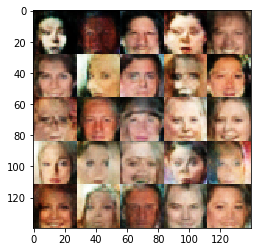

Epoch 1/1... Batch 5410... Discriminator Loss: 0.7685... Generator Loss: 1.0994
Epoch 1/1... Batch 5420... Discriminator Loss: 0.7866... Generator Loss: 1.0272
Epoch 1/1... Batch 5430... Discriminator Loss: 0.8301... Generator Loss: 1.0393
Epoch 1/1... Batch 5440... Discriminator Loss: 0.8487... Generator Loss: 0.9950
Epoch 1/1... Batch 5450... Discriminator Loss: 0.8982... Generator Loss: 1.1101
Epoch 1/1... Batch 5460... Discriminator Loss: 1.2653... Generator Loss: 0.5805
Epoch 1/1... Batch 5470... Discriminator Loss: 0.8280... Generator Loss: 0.9808
Epoch 1/1... Batch 5480... Discriminator Loss: 0.9828... Generator Loss: 0.7946
Epoch 1/1... Batch 5490... Discriminator Loss: 1.1535... Generator Loss: 0.6597
Epoch 1/1... Batch 5500... Discriminator Loss: 1.0638... Generator Loss: 0.7397


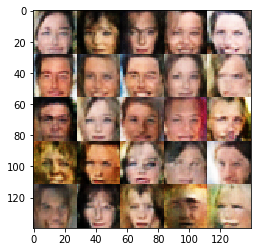

Epoch 1/1... Batch 5510... Discriminator Loss: 0.8717... Generator Loss: 0.8066
Epoch 1/1... Batch 5520... Discriminator Loss: 1.1483... Generator Loss: 0.9841
Epoch 1/1... Batch 5530... Discriminator Loss: 1.2549... Generator Loss: 0.5401
Epoch 1/1... Batch 5540... Discriminator Loss: 1.1531... Generator Loss: 1.3153
Epoch 1/1... Batch 5550... Discriminator Loss: 1.0500... Generator Loss: 0.7855
Epoch 1/1... Batch 5560... Discriminator Loss: 0.8650... Generator Loss: 1.0420
Epoch 1/1... Batch 5570... Discriminator Loss: 1.3135... Generator Loss: 0.6749
Epoch 1/1... Batch 5580... Discriminator Loss: 0.9989... Generator Loss: 0.9201
Epoch 1/1... Batch 5590... Discriminator Loss: 1.1934... Generator Loss: 0.5770
Epoch 1/1... Batch 5600... Discriminator Loss: 0.9587... Generator Loss: 0.9938


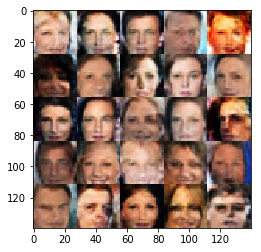

Epoch 1/1... Batch 5610... Discriminator Loss: 0.8148... Generator Loss: 1.1959
Epoch 1/1... Batch 5620... Discriminator Loss: 1.0722... Generator Loss: 1.2047
Epoch 1/1... Batch 5630... Discriminator Loss: 0.9466... Generator Loss: 1.2328
Epoch 1/1... Batch 5640... Discriminator Loss: 1.0081... Generator Loss: 0.7925
Epoch 1/1... Batch 5650... Discriminator Loss: 1.3027... Generator Loss: 0.4690
Epoch 1/1... Batch 5660... Discriminator Loss: 1.0154... Generator Loss: 0.7644
Epoch 1/1... Batch 5670... Discriminator Loss: 1.3577... Generator Loss: 0.6987
Epoch 1/1... Batch 5680... Discriminator Loss: 1.1416... Generator Loss: 0.6274
Epoch 1/1... Batch 5700... Discriminator Loss: 0.9689... Generator Loss: 1.2629


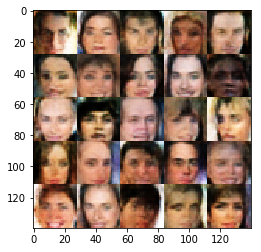

Epoch 1/1... Batch 5710... Discriminator Loss: 0.7444... Generator Loss: 1.1835
Epoch 1/1... Batch 5720... Discriminator Loss: 0.8292... Generator Loss: 1.0469
Epoch 1/1... Batch 5730... Discriminator Loss: 1.1384... Generator Loss: 0.7287
Epoch 1/1... Batch 5740... Discriminator Loss: 1.0864... Generator Loss: 0.7265
Epoch 1/1... Batch 5750... Discriminator Loss: 1.0269... Generator Loss: 0.7730
Epoch 1/1... Batch 5760... Discriminator Loss: 1.0872... Generator Loss: 0.7445
Epoch 1/1... Batch 5770... Discriminator Loss: 0.8027... Generator Loss: 0.9327
Epoch 1/1... Batch 5780... Discriminator Loss: 1.0545... Generator Loss: 0.7605
Epoch 1/1... Batch 5790... Discriminator Loss: 1.4942... Generator Loss: 0.4061
Epoch 1/1... Batch 5800... Discriminator Loss: 0.9303... Generator Loss: 0.9454


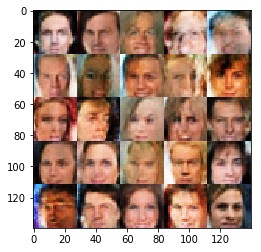

Epoch 1/1... Batch 5810... Discriminator Loss: 0.8234... Generator Loss: 1.0595
Epoch 1/1... Batch 5820... Discriminator Loss: 1.2107... Generator Loss: 0.5912
Epoch 1/1... Batch 5830... Discriminator Loss: 1.1507... Generator Loss: 0.6575
Epoch 1/1... Batch 5840... Discriminator Loss: 0.8556... Generator Loss: 1.2855
Epoch 1/1... Batch 5850... Discriminator Loss: 0.9813... Generator Loss: 0.8950
Epoch 1/1... Batch 5860... Discriminator Loss: 0.7078... Generator Loss: 1.1167
Epoch 1/1... Batch 5870... Discriminator Loss: 1.0507... Generator Loss: 0.8862
Epoch 1/1... Batch 5880... Discriminator Loss: 0.8325... Generator Loss: 0.8833
Epoch 1/1... Batch 5890... Discriminator Loss: 1.3923... Generator Loss: 0.6043
Epoch 1/1... Batch 5900... Discriminator Loss: 0.9285... Generator Loss: 0.8618


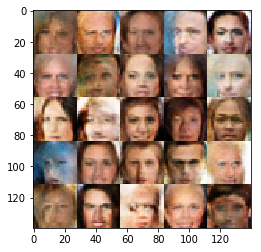

Epoch 1/1... Batch 5910... Discriminator Loss: 1.0485... Generator Loss: 0.8070
Epoch 1/1... Batch 5920... Discriminator Loss: 1.0229... Generator Loss: 1.5043
Epoch 1/1... Batch 5930... Discriminator Loss: 1.0854... Generator Loss: 0.7692
Epoch 1/1... Batch 5940... Discriminator Loss: 1.1078... Generator Loss: 0.6575
Epoch 1/1... Batch 5950... Discriminator Loss: 1.1921... Generator Loss: 0.8332
Epoch 1/1... Batch 5960... Discriminator Loss: 0.9521... Generator Loss: 0.8401
Epoch 1/1... Batch 5970... Discriminator Loss: 1.0624... Generator Loss: 0.8661
Epoch 1/1... Batch 5980... Discriminator Loss: 1.0346... Generator Loss: 0.8338
Epoch 1/1... Batch 5990... Discriminator Loss: 0.9443... Generator Loss: 0.8881
Epoch 1/1... Batch 6000... Discriminator Loss: 0.8051... Generator Loss: 1.0123


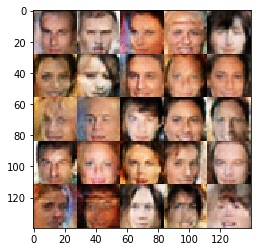

Epoch 1/1... Batch 6010... Discriminator Loss: 0.9812... Generator Loss: 0.8133
Epoch 1/1... Batch 6020... Discriminator Loss: 0.9361... Generator Loss: 0.8749
Epoch 1/1... Batch 6030... Discriminator Loss: 0.8744... Generator Loss: 0.8960
Epoch 1/1... Batch 6040... Discriminator Loss: 0.9073... Generator Loss: 1.2600


KeyboardInterrupt: 

In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.